# Esercizio 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

L'obiettivo di questo esercizio invece è utilizzare una rete neurale per fittare una funzione più complicata, ovvero un polinomio di terzo grado. La potenza delle reti neurali consiste nel fatto che questa non necessita di alcun modello (ad esempio un fit con un polinomio), ma si allena utilizzando direttamente i dati forniti.

In [1]:
# target parameters of f(x) = polinomio
a = 4
b = -3
c = -2
d = 3 

In [2]:
def pol(x):
    return a + b * x + c * x**2 + d * x**3

Utilizzo un numero totali di dati pari a 100000, divisi al 95% in dati per il training e al 5% per la validazione.

In [3]:
import numpy as np

Ntot = 100000

# generate training inputs
seed=0
np.random.seed(seed) # fix random seed
x_train = np.random.uniform(-1, 1, int(Ntot*0.95))
x_valid = np.random.uniform(-1, 1, int(Ntot*0.05))
x_valid.sort()
y_target = pol(x_valid) # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c * x_train**2 + d * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * x_valid**2 + d * x_valid**3, sigma)

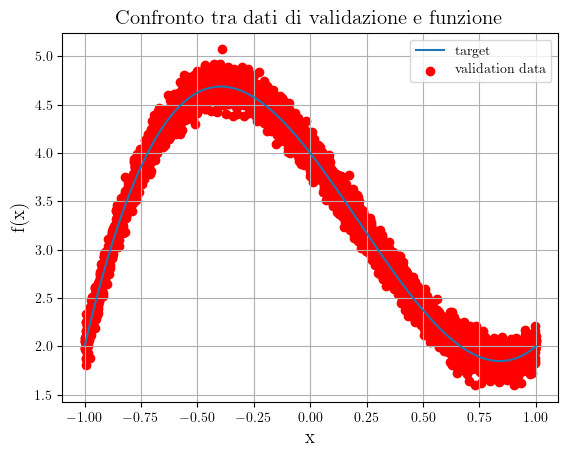

In [4]:
# plot validation and target dataset
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.xlabel("x", fontsize = 14)
plt.ylabel("f(x)", fontsize = 14)
plt.title("Confronto tra dati di validazione e funzione", fontsize = 15, fontweight = "bold")
plt.show()

Ho scelto una rete neurale con le seguenti caratteristiche:
- 5 layers con un numero di neuroni decrescente;
- funzione di attivazione relu (provandone altre ho notato che questa è la migliore);
- come ottimizzatore ho utilizzato un stocastic gradient discendent;
- infine per la funzione di loss ho optato per il mean squared error. 

In [5]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

tf.random.set_seed(seed)

model = tf.keras.Sequential()
#model.add(Dense(1, input_shape=(1,)))
#model.add(Dense(50, input_shape=(1,)))
model.add(Dense(40,input_shape=(1,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2024-06-16 14:46:04.043937: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-16 14:46:04.048252: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-16 14:46:04.106330: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 14:46:04.106376: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 14:46:04.107731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [6]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                80        
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 2201 (8.60 KB)
Trainable params: 2201 (8.6

In [7]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=250, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100


380/380 [==============================] - 2s 3ms/step - loss: 0.4432 - mse: 0.4432 - val_loss: 0.0260 - val_mse: 0.0260
Epoch 2/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 3/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0123 - val_mse: 0.0123
Epoch 4/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 5/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 6/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 7/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 8/100
380/380 [==============================] - 1s 3ms/step - loss: 0.0110

In [8]:
# return weights and biases
model.get_weights()

[array([[ 0.14273174,  0.3841295 , -0.00054941,  0.22087654,  0.12042746,
         -0.19761536,  0.17470619,  0.33257577,  0.41251555,  0.16772658,
          0.11674704,  0.3939504 , -0.06682837,  0.169208  , -0.01437925,
          0.26910928, -0.2961204 ,  0.48260757,  0.38967615,  0.11649072,
         -0.29072055,  0.28341156, -0.4545878 ,  0.28617722, -0.2704294 ,
          0.16914178, -0.18639128,  0.05895228,  0.01738054,  0.14408936,
         -0.26450637, -0.15510315, -0.18770158,  0.17485967, -0.33622876,
          0.02131479,  0.35667247, -0.41207343,  0.36811692,  0.12590842]],
       dtype=float32),
 array([ 0.14514668,  0.03339444, -0.13651103, -0.08508556,  0.05925301,
         0.00389145, -0.09424708, -0.0249972 ,  0.01320107,  0.06987759,
        -0.08512171,  0.12941556, -0.01170814,  0.12281486,  0.09696043,
         0.0867976 ,  0.02407669,  0.05372895,  0.04705085,  0.12059052,
        -0.07801478,  0.06308668, -0.04705213,  0.05726714, -0.12114836,
         0.0329329

In [9]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

157/157 [==============================] - 0s 1ms/step - loss: 0.0101 - mse: 0.0101

Test loss: 0.010130359791219234
Test accuracy: 0.010130359791219234


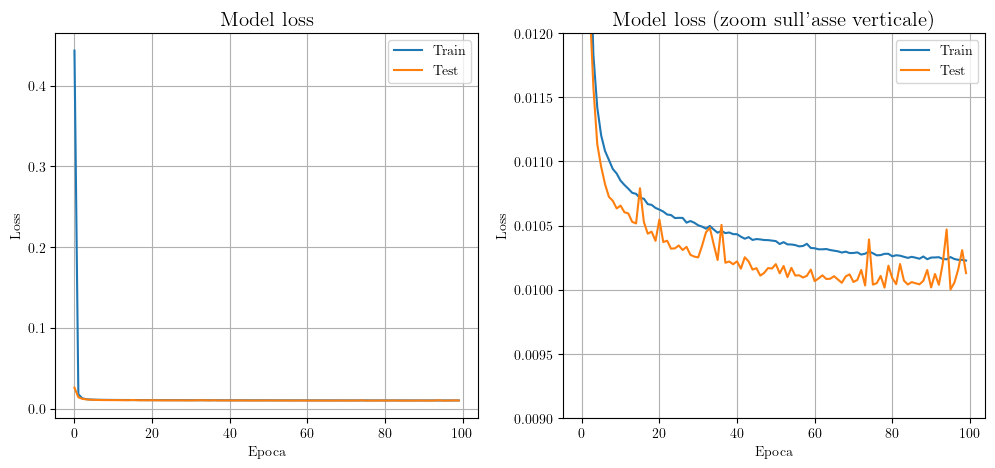

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontsize = 15, fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()

# Secondo grafico con ylim diverso
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss (zoom sull\'asse verticale)', fontsize = 15, fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoca')
plt.legend(['Train', 'Test'], loc='best')
plt.ylim(0.009, 0.012)
plt.grid()

plt.show()


32/32 [==============================] - 0s 1ms/step


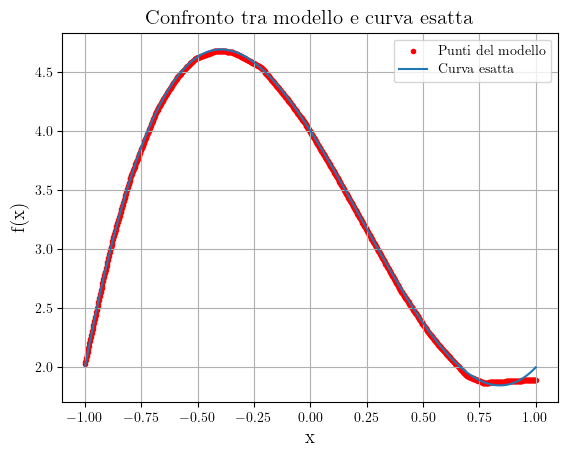

In [11]:
x_predicted = np.linspace(-1, 1, 1000)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', marker='.')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.xlabel("x", fontsize = 14)
plt.ylabel("f(x)", fontsize = 14)
plt.title("Confronto tra modello e curva esatta", fontsize = 15, fontweight = "bold")
plt.legend(['Punti del modello', 'Curva esatta'], loc='best')
plt.show()

32/32 [==============================] - 0s 1ms/step


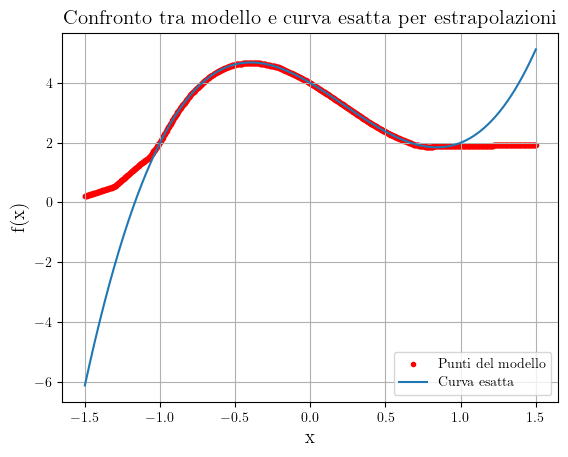

In [12]:
x_predicted = np.linspace(-1.5, 1.5, 1000)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', marker='.')
plt.plot(x_predicted, pol(x_predicted))
plt.title("Confronto tra modello e curva esatta per estrapolazioni", fontsize = 15, fontweight = "bold")
plt.legend(['Punti del modello', 'Curva esatta'], loc='best')
plt.xlabel("x", fontsize = 14)
plt.ylabel("f(x)", fontsize = 14)
plt.grid(True)
plt.show()


Variando ampiamente i parametri, ho notato che è abbastanza facile ottenere una rete neurale che approssimi la funzione (soprattutto nella parte centrale); tuttavia, ho faticato a trovare un modo per approssimare al meglio la funzione ai bordi. 

Quello che ho potuto osservare è che la componente stocastica del metodo SGD è fondamentale: impostando il parametro batch_size a un valore alto (anche con molte epoche), si nota come la rete neurale trovi subito dei parametri soddisfacenti per il fit, ma poi questi, con l'aumentare delle epoche, non migliorano più; al contrario, con batch_size basso, la convergenza è più lenta ma continua a migliorare i parametri. Proprio così sono riuscito a migliorare l'errore commesso dalla rete proprio ai bordi dell'intervallo [-1,1].

Sperimentando, ho notato che aumentando la complessità della rete non è detto che, a parità di dati utilizzati, il risultato migliori; anzi ad un certo punto la complessità del modello diveta troppo elevata rispetto al numeri di dati disponibili per il training. Questo si traduce in un errore che aumenta all'aumentare del numero dei parametri della rete.

Per quanto riguarda il potere predittivo della rete neurale, questo risulta piuttosto buono nell'intervallo in cui è stata allenata; tuttavia, se proviamo ad estendere il modello oltre, ci accorgiamo che ne non ha alcuno.